In [1]:
from scipy.special import factorial
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ln_stirling(n):
    return n*np.log(n) - n + 0.5*np.log(2*np.pi*n)

def stirling(n):
    return n**n * np.exp(-n) * np.sqrt(2*np.pi*n)

def ln_factorial(n):
    return np.log(factorial(n))


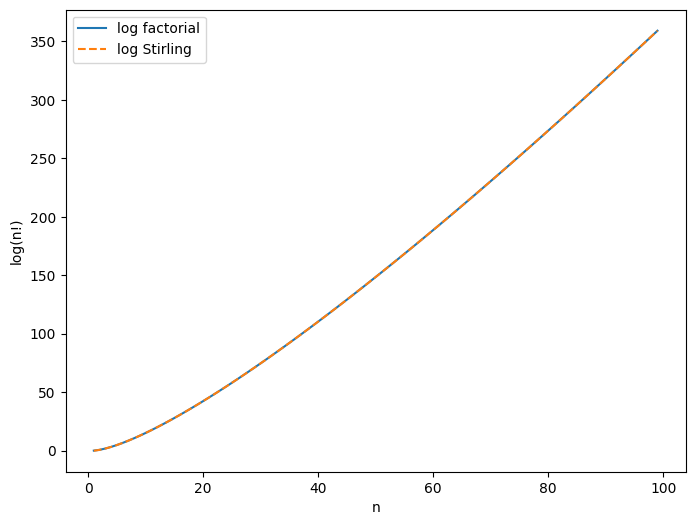

In [3]:
# plot the difference between the two functions
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
n = np.arange(1, 100)
ax.plot(n, ln_factorial(n), label='log factorial')
ax.plot(n, ln_stirling(n), label='log Stirling', linestyle='--')

ax.set_xlabel('n')
ax.set_ylabel('log(n!)')
ax.legend()

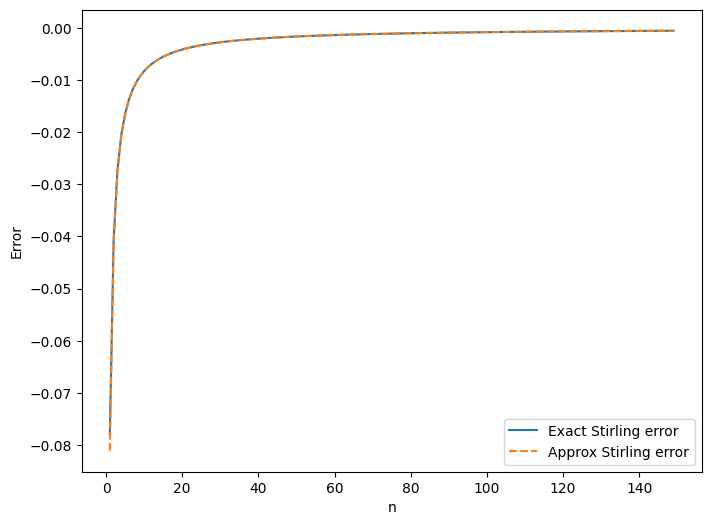

In [4]:
# plot the percentage difference
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
n = np.arange(1, 150)

def stirling_error(n):
    return np.exp(ln_stirling(n) - ln_factorial(n)) - 1

def approx_error(n):
    return (ln_stirling(n) - ln_factorial(n))

ax.plot(n, stirling_error(n), label='Exact Stirling error')
ax.plot(n, approx_error(n), label='Approx Stirling error', linestyle='--')

ax.set_xlabel('n')
ax.set_ylabel('Error')
ax.legend()




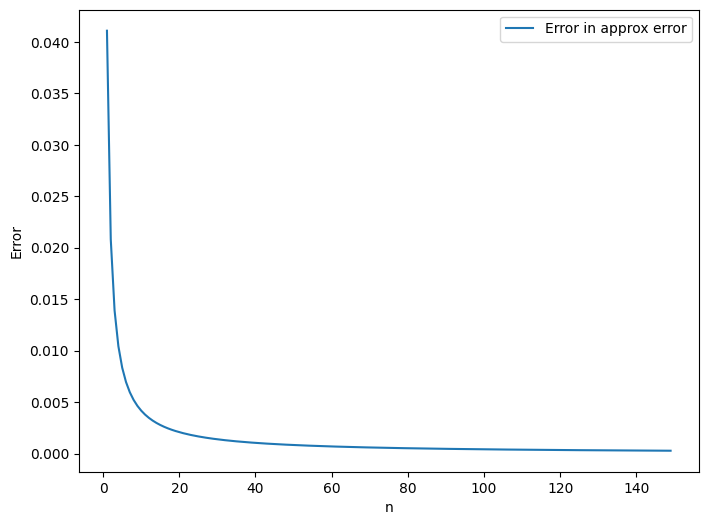

In [5]:
# percentage error of the approx error lol
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
n = np.arange(1, 150)

def approx_error_of_error(n):
    return (approx_error(n) - stirling_error(n)) / stirling_error(n)

ax.plot(n, approx_error_of_error(n), label='Error in approx error')

ax.set_xlabel('n')
ax.set_ylabel('Error')
ax.legend()


In [6]:
# actually walking through derivation of stirling's approximation

def gamma_integrand(x, n):
    return np.exp(-x) * x**n


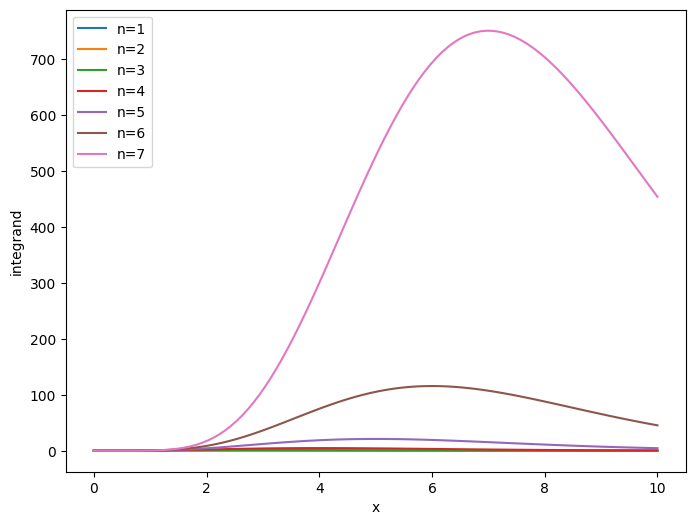

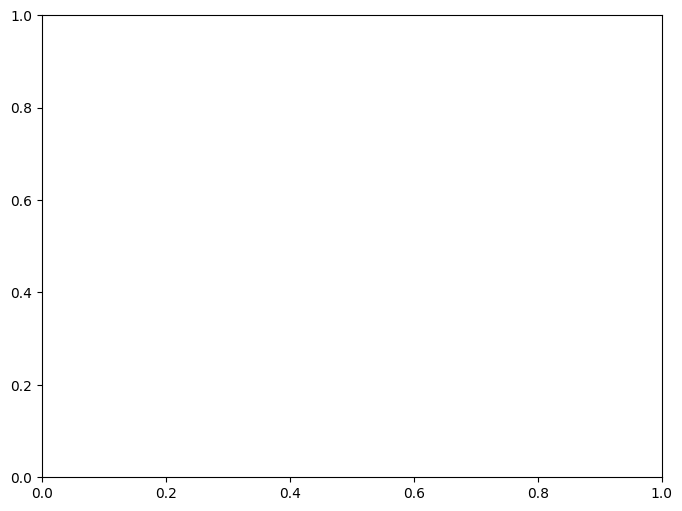

In [7]:
# let's plot the integrand for a few values of n
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
x = np.linspace(0, 10, 100)
for n in range(1, 8):
    ax.plot(x, gamma_integrand(x, n), label=f'n={n}')
ax.set_xlabel('x')
ax.set_ylabel('integrand')
ax.legend()

# plot the max value of the integrand for a few values of n
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
n = np.arange(1, 100)
# find n that maximizes the integrand
    

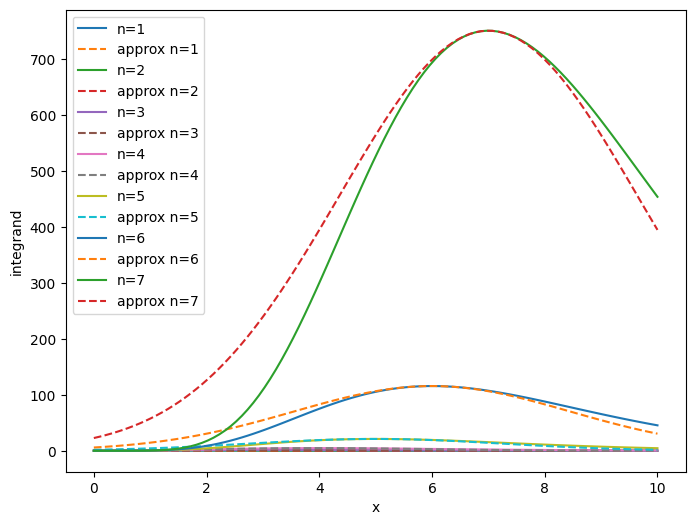

In [8]:
# now lets compare the gaussian integral to the gamma integral

def gauss_approx_integrand(x, n):
    return np.exp(-n + n*np.log(n) - (x-n)**2/(2*n))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
x = np.linspace(0, 10, 100)
for n in range(1, 8):
    ax.plot(x, gamma_integrand(x, n), label=f'n={n}')
    ax.plot(x, gauss_approx_integrand(x, n), label=f'approx n={n}', linestyle='--')
ax.set_xlabel('x')
ax.set_ylabel('integrand')
ax.legend()


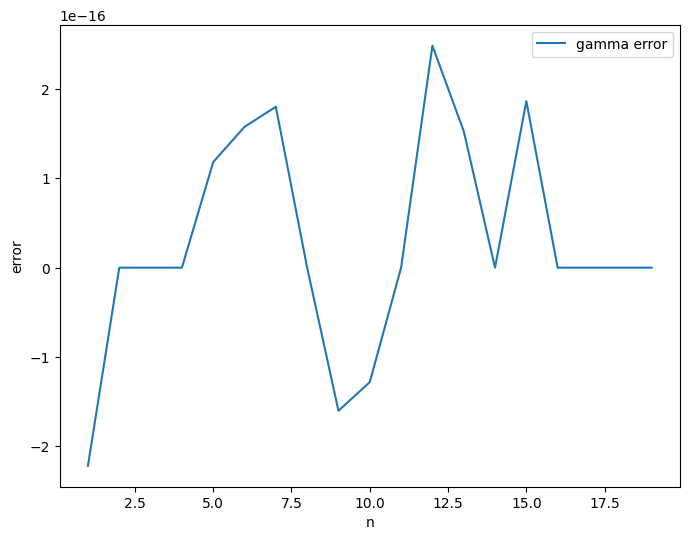

In [9]:
# let's plot percentage error for different values of n
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
n = np.arange(1, 100)

from scipy.integrate import quad
from scipy.special import gamma

# for shigs and gigs, lets try to numerically integrate the gamma function integrand
def gamma_num(n):
    return quad(gamma_integrand, 0, np.inf, args=n)[0]

# compare to the gamma function
err = []
for n in range(1, 20):
    err.append((gamma_num(n) - gamma(n+1)) / gamma(n+1))

ax.plot(np.arange(1, 20), err, label='gamma error')
ax.set_xlabel('n')
ax.set_ylabel('error')
ax.legend()

    


# smol error

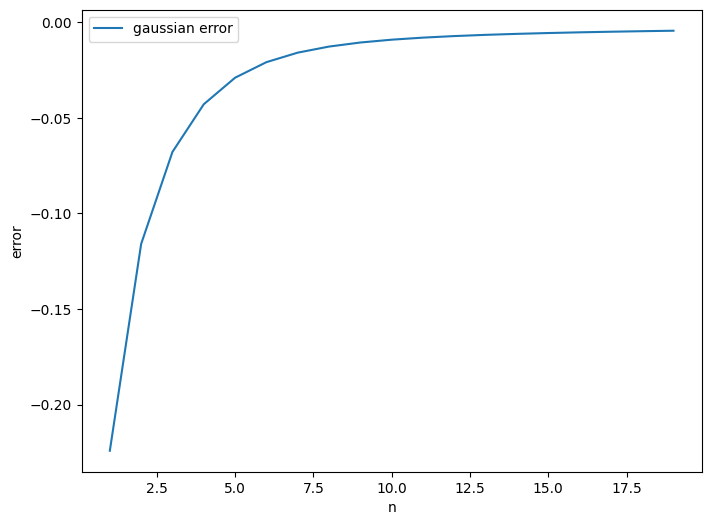

In [10]:
# now let's try to numerically integrate the gaussian approximation from 0 to infinity

def gauss_approx_num(n):
    return quad(gauss_approx_integrand, 0, np.inf, args=n)[0]

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# compare to the gamma function
err = []
for n in range(1, 20):
    err.append((gauss_approx_num(n) - gamma(n+1)) / gamma(n+1))

ax.plot(np.arange(1, 20), err, label='gaussian error')
ax.set_xlabel('n')
ax.set_ylabel('error')
ax.legend()

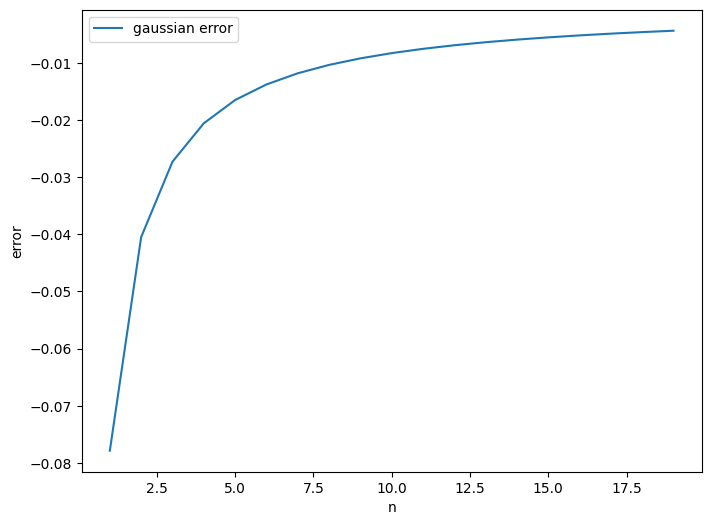

In [11]:
# but what about diff of the integral over all x?
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

def gauss_approx_n_inf(n):
    return quad(gauss_approx_integrand, -np.inf, np.inf, args=n)[0]

err = []
for n in range(1, 20):
    err.append((gauss_approx_n_inf(n) - gamma(n+1)) / gamma(n+1))
    
ax.plot(np.arange(1, 20), err, label='gaussian error')
ax.set_xlabel('n')
ax.set_ylabel('error')
ax.legend()

# smol error

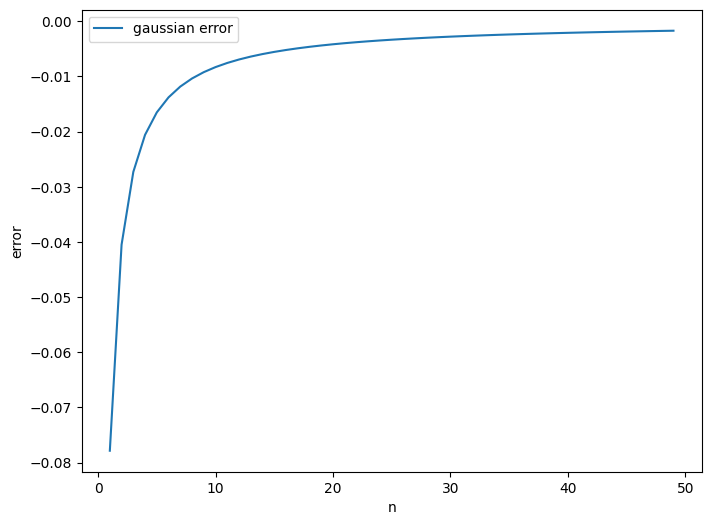

In [12]:
# now finally, let's compare the guassian approx over all x to the gamma function
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

err = []
for n in range(1, 50):
    err.append((gauss_approx_n_inf(n) - gamma(n+1)) / gamma(n+1))
    
ax.plot(np.arange(1, 50), err, label='gaussian error')
ax.set_xlabel('n')
ax.set_ylabel('error')
ax.legend()

